In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [3]:
df.columns = ['Дата', 'Склад', 'Контрагент', 'Номенклатура', 'Количество']

In [4]:
df['Дата'] = pd.to_datetime(df['Дата'], errors='coerce')

In [9]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Дата          301355 non-null  datetime64[ns]
 1   Склад         301355 non-null  int64         
 2   Контрагент    301355 non-null  object        
 3   Номенклатура  301355 non-null  object        
 4   Количество    301355 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 11.5+ MB


(        Дата  Склад Контрагент Номенклатура  Количество
 0 2018-01-04      1  address_0    product_0           4
 1 2018-01-04      1  address_0    product_1           4
 2 2018-01-04      1  address_0    product_2           5
 3 2018-01-04      1  address_0    product_3          10
 4 2018-01-04      1  address_0    product_4           2,
 None)

Сразу переведем столбец "Дата" в правильный формат

Сгруппируйте данные по дате, посчитайте количество продаж

In [5]:
grouped_df = df.groupby('Дата').agg({'Количество': 'sum'}).reset_index()

Вывести несколько первых строк сгруппированных данных

In [6]:
grouped_df.head()

,Дата,Количество
0,2018-01-04,3734
1,2018-01-05,3643
2,2018-01-06,3193
3,2018-01-07,3298
4,2018-01-09,4055


Нарисуйте график продаж у `grouped_df`

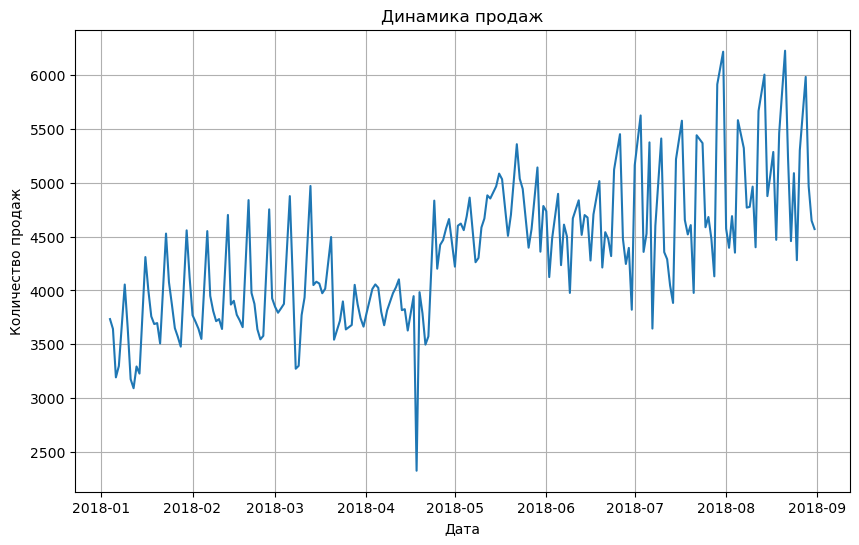

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'])
plt.title('Динамика продаж')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.grid(True)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

### Анализ графика продаж демонстрирует ярко выраженную сезонность с пиками и спадами, что характерно для многих рынков. Неравномерность продаж свидетельствует о влиянии не только сезонных факторов, но и других внешних событий, таких как праздничные дни, маркетинговые кампании или разовые крупные заказы, отражающиеся на графике в виде выбросов. Несмотря на эти колебания, можно наблюдать общую тенденцию роста или снижения продаж за анализируемый период.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [14]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [15]:
outliers = df[df['Количество'] > upper_bound]
print(outliers)

             Дата  Склад   Контрагент Номенклатура  Количество
3      2018-01-04      1    address_0    product_3          10
59     2018-01-04      1    address_3    product_6          10
142    2018-01-04      1   address_10    product_2          10
175    2018-01-04      1   address_14    product_1           9
176    2018-01-04      1   address_14    product_2          10
...           ...    ...          ...          ...         ...
301309 2018-08-31      5  address_169    product_0          10
301310 2018-08-31      5  address_169    product_1          20
301311 2018-08-31      5  address_169    product_2          15
301312 2018-08-31      5  address_169    product_3          10
301315 2018-08-31      5  address_169    product_6          15

[13140 rows x 5 columns]


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [16]:
df_filtered = df[(df['Дата'].dt.dayofweek == 2) &  # Среда
                 (df['Склад'] == 3) &
                 (df['Дата'].dt.month.isin([6, 7, 8]))]

In [19]:
sales_by_product = df_filtered.groupby('Номенклатура')['Количество'].sum().reset_index()

In [20]:
top_product = sales_by_product.sort_values(by='Количество', ascending=False).iloc[0]

In [21]:
print(top_product)

Номенклатура    product_1
Количество           2267
Name: 1, dtype: object


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [45]:
df_temp = pd.read_csv('temperature_data.csv')

In [47]:
df_temp['Дата'] = pd.to_datetime(df['Дата']).dt.date

In [50]:
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата'])
df_temp['Дата'] = pd.to_datetime(df_temp['Дата'])

combined_df = pd.merge(grouped_df, df_temp[['Дата', 'T']], on='Дата', how='left')

combined_df['T'] = combined_df['T'].fillna(combined_df['T'].mean())

In [51]:
combined_df.rename(columns={'Средняя температура за день': 'T'}, inplace=True)

In [52]:
combined_df.head()

,Дата,Количество,T
0,2018-01-04,3734,-16.3
1,2018-01-04,3734,-17.7
2,2018-01-04,3734,-18.1
3,2018-01-04,3734,-15.9
4,2018-01-04,3734,-17.9


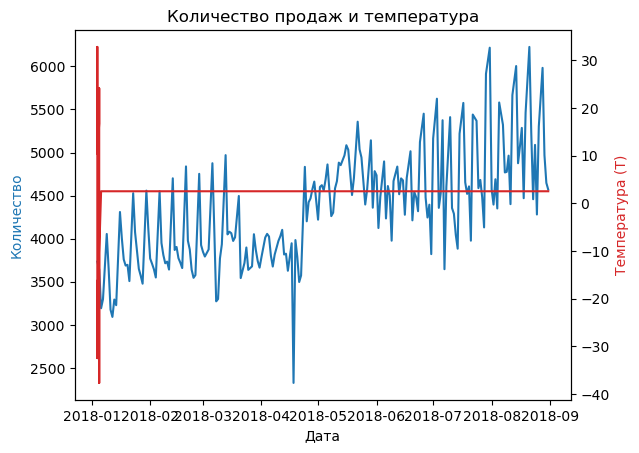

In [53]:
fig, ax1 = plt.subplots()

ax1.set_xlabel('Дата')
ax1.set_ylabel('Количество', color='tab:blue')
ax1.plot(combined_df['Дата'], combined_df['Количество'], color='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Температура (T)', color='tab:red')
ax2.plot(combined_df['Дата'], combined_df['T'], color='tab:red')

plt.title('Количество продаж и температура')
plt.show()

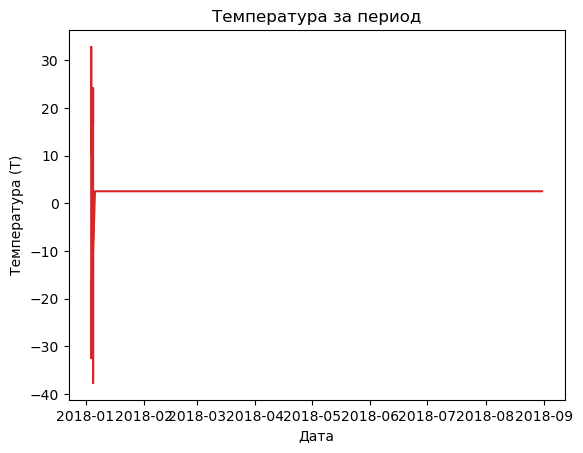

In [54]:
plt.figure()
plt.plot(combined_df['Дата'], combined_df['T'], color='tab:red')
plt.xlabel('Дата')
plt.ylabel('Температура (T)')
plt.title('Температура за период')
plt.show()